In [1]:
# pip install prophet

In [2]:
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
# import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
# from plotnine import *
import io

import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('Agri_all.csv')
df

,YMD,YM,MD,Product,Price,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,4.400000,12.800000,35.200000,0.000000,2.600000,1.600000,0.000000
1,2005-01-04,200501,104,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,-0.200000,8.800000,26.000000,0.000000,2.800000,2.800000,0.000000
2,2005-01-05,200501,105,마늘,20928.571429,1013.00,3.33,49.58,58.27,65.4,60.5,-1.400000,11.200000,33.400000,0.000000,0.600000,3.200000,0.000000
3,2005-01-06,200501,106,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.800000,7.800000,31.200000,1.200000,1.200000,2.600000,0.000000
4,2005-01-07,200501,107,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.000000,7.600000,28.400000,0.000000,2.800000,2.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,2020-12-24,202012,1224,고구마,10258.695652,1180.05,0.70,137.90,96.13,108.6,116.4,3.529412,8.588235,59.117647,0.000000,1.705882,3.529412,0.000000
15876,2020-12-28,202012,1228,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,3.941176,11.941176,80.352941,0.058824,0.411765,3.117647,0.000000
15877,2020-12-29,202012,1229,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,1.590909,9.227273,77.227273,1.272727,1.863636,0.636364,0.772727
15878,2020-12-30,202012,1230,고구마,10460.735294,1180.05,0.70,137.90,96.13,108.6,116.4,-5.500000,6.250000,65.375000,0.291667,3.958333,2.666667,0.833333


In [4]:
df = df[df['Product'] == '깻잎']
df.rename(columns = {'YMD' : 'ds', 'Price' : 'y'}, inplace=True)
df = df.reset_index()
df = df.drop(columns='index')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,깻잎,4534.333333,1013.00,3.33,NaN,53.348,65.4,60.5,4.500000,10.500000,27.000000,0.000000,2.000000,0.500000,0.000000
1,2005-01-04,200501,104,깻잎,4614.673913,1013.00,3.33,NaN,53.348,65.4,60.5,-2.000000,9.000000,23.000000,0.000000,2.500000,4.000000,0.000000
2,2005-01-05,200501,105,깻잎,5114.642857,1013.00,3.33,NaN,53.348,65.4,60.5,-3.000000,13.500000,28.500000,0.000000,0.500000,3.500000,0.000000
3,2005-01-06,200501,106,깻잎,4895.595238,1013.00,3.33,NaN,53.348,65.4,60.5,1.000000,9.000000,27.500000,0.000000,1.000000,3.000000,0.000000
4,2005-01-07,200501,107,깻잎,4615.465116,1013.00,3.33,NaN,53.348,65.4,60.5,0.500000,8.000000,24.500000,0.000000,2.000000,4.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2020-12-24,202012,1224,깻잎,5960.655738,1180.05,0.70,NaN,87.660,108.6,116.4,3.769231,10.538462,56.000000,0.000000,1.769231,4.615385,0.000000
3966,2020-12-28,202012,1228,깻잎,7610.655738,1180.05,0.70,NaN,87.660,108.6,116.4,3.076923,12.307692,86.923077,0.000000,0.000000,3.230769,0.000000
3967,2020-12-29,202012,1229,깻잎,7375.833333,1180.05,0.70,NaN,87.660,108.6,116.4,2.384615,11.461538,81.307692,1.000000,1.615385,2.230769,0.230769
3968,2020-12-30,202012,1230,깻잎,7581.803279,1180.05,0.70,NaN,87.660,108.6,116.4,-5.285714,7.214286,53.714286,0.428571,4.357143,5.928571,0.285714


In [5]:
start_date = pd.to_datetime('2005-01-01') ## 시작 날짜
end_date = pd.to_datetime('2020-12-31') ## 마지막 날짜
 
dates = pd.date_range(start_date,end_date,freq='D') ## 일단위로 생성
dates = pd.DataFrame(dates)
dates = dates.rename(columns={0 : 'ds'})
dates

,ds
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
5839,2020-12-27
5840,2020-12-28
5841,2020-12-29
5842,2020-12-30


In [6]:
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
def _fig_plot(df, X, Y):
  ''' Function plots the data. requires to provide dataframe in the
  format of date as ds, observation as y, Preset other variables e.g., axis name
  '''
  df.plot(x = X, y = Y, figsize=Figsize, label = Label)
  plt.xlabel(xAxisLabel, fontsize = 16) # matplotlib.pyplot
  plt.ylabel(yAxisLabel, fontsize = 16)
  plt.legend()
  plt.title(Title, fontsize = 20)
  ax = plt.gca().get_xaxis()

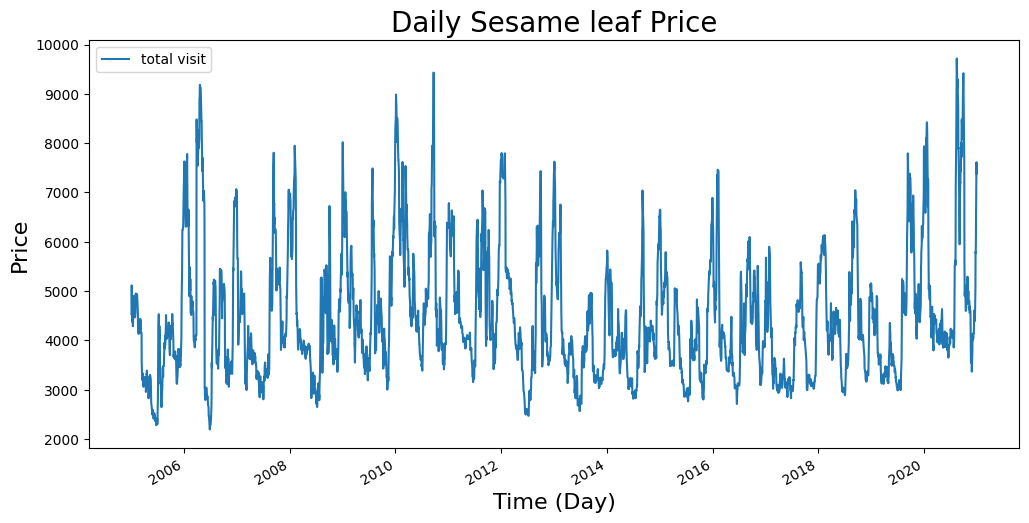

In [8]:
X = 'ds'
Y = 'y'
Label = "total visit"
Figsize = (12,6)
Title = "Daily Sesame leaf Price"
xAxisLabel = 'Time (Day)'
yAxisLabel = 'Price'
_fig_plot(df, X, Y)

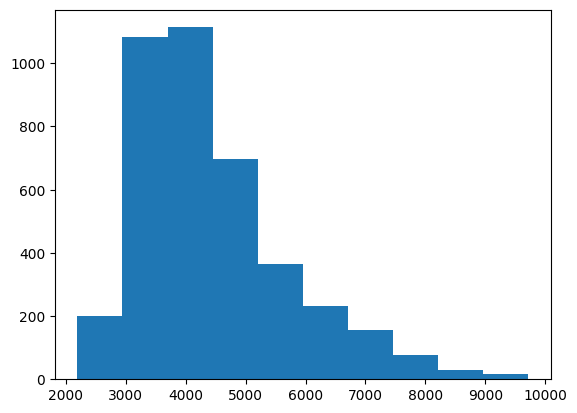

In [9]:
plt.hist(df.y)
plt.show()

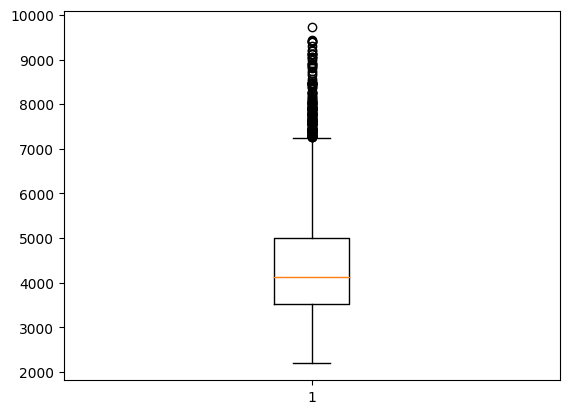

In [10]:
plt.boxplot(df.y)
plt.show()

In [11]:
df_raw = df.copy()
df['y'] = np.log(df['y'])

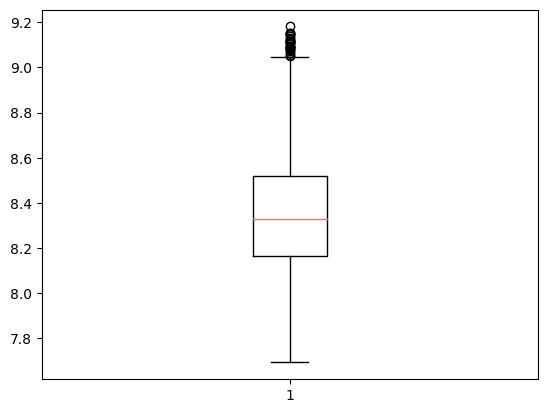

In [12]:
plt.boxplot(df.y.values)
plt.show()

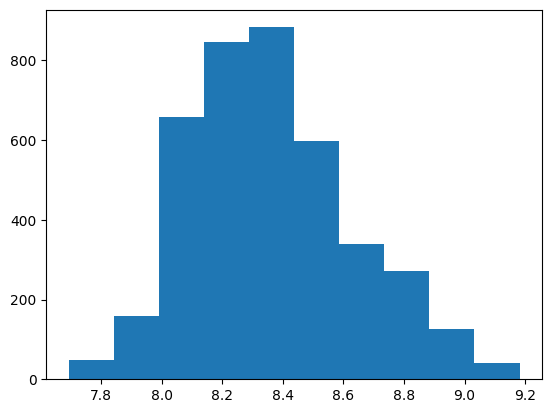

In [13]:
plt.hist(df.y)
plt.show()

In [14]:
Q1=df.y.quantile(0.25)
Q3=df.y.quantile(0.75)
IQR = Q3-Q1
LT=Q1-1.5*IQR
HT= Q3+1.5*IQR
print(LT, HT)
df['outlier']=np.where(((df['y']<LT)|(df['y']>HT)),'yes','no')

7.637269934390586 9.046441859746592


In [15]:
df['outlier'].value_counts()

no     3941
yes      29
Name: outlier, dtype: int64

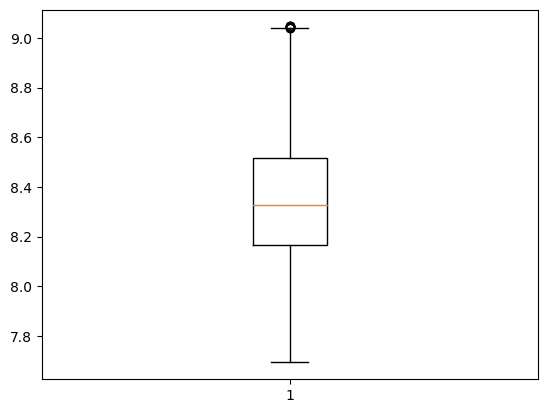

In [16]:
plt.boxplot(df[df.outlier=='no'].y)
plt.show()

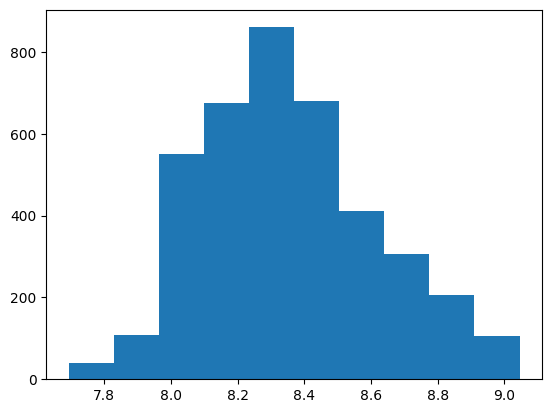

In [17]:
plt.hist(df[df.outlier=='no'].y)
plt.show()

15:22:11 - cmdstanpy - INFO - Chain [1] start processing
15:22:12 - cmdstanpy - INFO - Chain [1] done processing


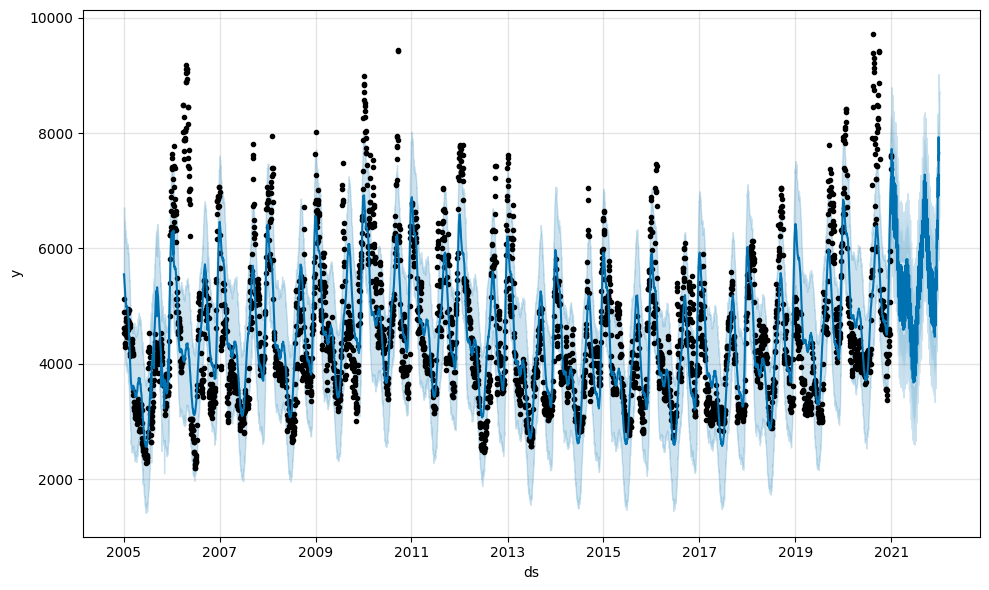

In [18]:
m = Prophet()
m.fit(df_raw)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

In [19]:
# evaluation_model = cross_validation(m, initial='730 days', period='180 days', horizon = '30 days')
# evaluation_metrix = performance_metrics(evaluation_model)
# evaluation_metrix.head(5)

In [20]:
from sklearn.model_selection import ParameterGrid
params_grid = {
              'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]
               }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [21]:
df[df['ds'] == '2019-12-31']

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count,outlier
3721,2019-12-31,201912,1231,깻잎,8.971886,1157.8,1.59,NaN,90.941,101.0,97.4,-2.461538,6.923077,38.307692,0.0,3.923077,6.692308,1.0,no


In [22]:
train = df.iloc[:3722]      
test = df.iloc[3722:]

In [23]:
print('Training data, last date: ' + str(train.tail(1)['ds']) + ' ' + 'testing data, last date: ' + str(test.tail(1)['ds']))

Training data, last date: 3721   2019-12-31
Name: ds, dtype: datetime64[ns] testing data, last date: 3969   2020-12-31
Name: ds, dtype: datetime64[ns]


In [24]:
# 휴일 생성
import holidays

# 필요한 날짜만큼 생성
date_list = pd.date_range('2010-01-01', '2020-12-31')

# 한국 휴일 객체 생성
kr_holidays = holidays.KR()

# generate holiday table
holiday = pd.DataFrame(columns=['ds','holiday'])
holiday['ds'] = sorted(date_list)
holiday['holiday'] = holiday.ds.apply(lambda x: kr_holidays.get(x) if x in kr_holidays else 'non-holiday')
holiday.head()

,ds,holiday
0,2010-01-01,New Year's Day
1,2010-01-02,non-holiday
2,2010-01-03,non-holiday
3,2010-01-04,non-holiday
4,2010-01-05,non-holiday


# 그리드서치

In [25]:
# model_parameters = pd.DataFrame(columns = ['MAE','Parameters'])
# for p in grid:
#     LOL = pd.DataFrame()
#     print(p)
# #    random.seed(0)
#     train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
#                          holidays_prior_scale = p['holidays_prior_scale'],
#                          n_changepoints = p['n_changepoints'],
#                          seasonality_mode = p['seasonality_mode'],
                         
#                          daily_seasonality = True,
#                          yearly_seasonality = True,
#                          holidays=holiday, 
#                          interval_width=0.95)
    
#     train_model.fit(train)
#     future = train_model.make_future_dataframe(periods=248, freq='D',include_history = False)
#     train_forecast = train_model.predict(future)
#     LOL=train_forecast[['ds','yhat']]
#     y_true= test['y'].values
#     y_pred = LOL['yhat'][:len(y_true)].values
#     mae = mean_absolute_error(y_true, y_pred)
#     print('Mean Absolute Error: %.3f' % mae)
#     model_parameters = model_parameters.append({'MAE':mae,'Parameters':p},ignore_index=True)

In [26]:
# parameters = model_parameters.sort_values(by=['MAE'])
# parameters = parameters.reset_index(drop=True)
# parameters.head()

In [27]:
# parameters['Parameters'][0]

In [28]:
df = pd.merge(dates, df, how='outer', on='ds')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count,outlier
0,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-01-03,200501.0,103.0,깻잎,8.419433,1013.00,3.33,NaN,53.348,65.4,60.5,4.500000,10.500000,27.000000,0.000000,2.000000,0.500000,0.000000,no
3,2005-01-04,200501.0,104.0,깻잎,8.436996,1013.00,3.33,NaN,53.348,65.4,60.5,-2.000000,9.000000,23.000000,0.000000,2.500000,4.000000,0.000000,no
4,2005-01-05,200501.0,105.0,깻잎,8.539863,1013.00,3.33,NaN,53.348,65.4,60.5,-3.000000,13.500000,28.500000,0.000000,0.500000,3.500000,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5840,2020-12-28,202012.0,1228.0,깻잎,8.937305,1180.05,0.70,NaN,87.660,108.6,116.4,3.076923,12.307692,86.923077,0.000000,0.000000,3.230769,0.000000,no
5841,2020-12-29,202012.0,1229.0,깻잎,8.905964,1180.05,0.70,NaN,87.660,108.6,116.4,2.384615,11.461538,81.307692,1.000000,1.615385,2.230769,0.230769,no
5842,2020-12-30,202012.0,1230.0,깻잎,8.933506,1180.05,0.70,NaN,87.660,108.6,116.4,-5.285714,7.214286,53.714286,0.428571,4.357143,5.928571,0.285714,no


In [29]:
train = df.iloc[:5478]      
test = df.iloc[5478:]

In [30]:
print('Training data, last date: ' + str(train.tail(1)['ds']) + ' ' + 'testing data, last date: ' + str(test.tail(1)['ds']))

Training data, last date: 5477   2019-12-31
Name: ds, dtype: datetime64[ns] testing data, last date: 5843   2020-12-31
Name: ds, dtype: datetime64[ns]


In [31]:
df.columns

Index(['ds', 'YM', 'MD', 'Product', 'y', 'KRW_USD_EXR', 'Annual_Call_Rate',
       'item_PPI', 'item_CPI', 'Food_Price_Index', 'Cereals_Price_Index',
       'DayAvg_Temperature', 'DayDiff_Temperature', 'DayAvg_RelativeHumidity',
       'DaySum_Rainfall', 'DayAvg_WindSpeed', 'DaySum_Sunshine',
       'Warning_Count', 'outlier'],
      dtype='object')

In [32]:
train = train.drop(columns=['YM', 'MD', 'Product', 'KRW_USD_EXR', 'Annual_Call_Rate',
       'item_PPI', 'item_CPI', 'Food_Price_Index', 'Cereals_Price_Index', 'outlier'
       ])
train['Warning_Count'] = np.exp(train['Warning_Count'])
train.columns

Index(['ds', 'y', 'DayAvg_Temperature', 'DayDiff_Temperature',
       'DayAvg_RelativeHumidity', 'DaySum_Rainfall', 'DayAvg_WindSpeed',
       'DaySum_Sunshine', 'Warning_Count'],
      dtype='object')

In [33]:
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.2,
                      holidays_prior_scale = 0.3,
                      n_changepoints = 200,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.fit(train)

15:22:15 - cmdstanpy - INFO - Chain [1] start processing
15:23:09 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = final_model.make_future_dataframe(periods=366, freq='D')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
5837,2020-12-25,8.751921,6.531881,10.790879
5838,2020-12-26,8.798974,6.604715,10.934552
5839,2020-12-27,8.839753,6.621257,10.927613
5840,2020-12-28,8.838265,6.578665,10.995470
5841,2020-12-29,8.845617,6.583229,10.909170
5842,2020-12-30,8.841432,6.571720,11.005915
5843,2020-12-31,8.833260,6.522118,10.923433


### 주석풀지마시오

In [35]:
# figure = plt.figure(figsize=(12, 6), dpi=80)
# plt.plot(y_true, label='Actual')
# plt.plot(y_pred, label='Predicted')
# plt.xlabel('Time ->>>', fontsize = 18)
# plt.ylabel('$ Price ->>>', fontsize = 18)
# plt.title('Stock price prediction with Fb Prophet', fontsize = 26)
# plt.legend()
# plt.show()

In [44]:
df['y']=np.exp(df['y'])
# forecast['yhat']=np.exp(forecast['yhat'])

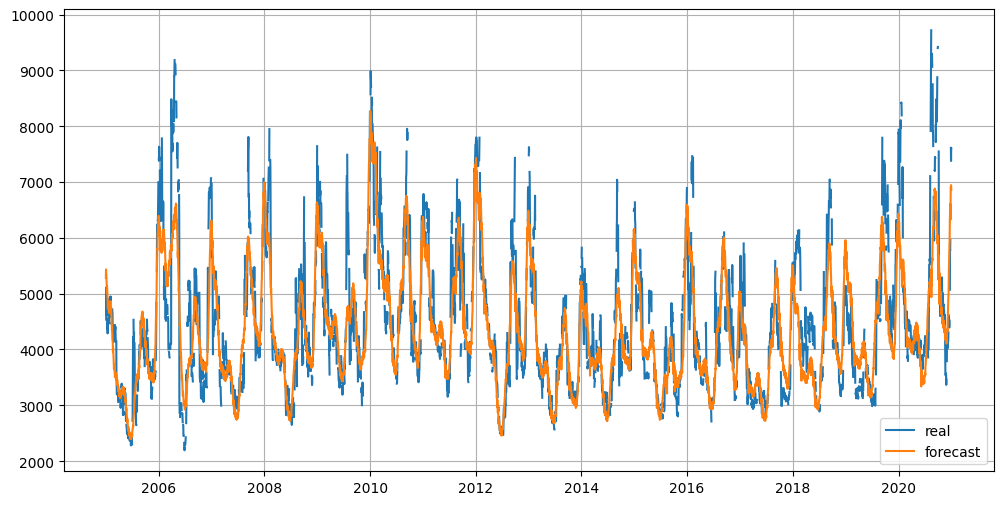

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [38]:
df.tail()

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count,outlier
5839,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5840,2020-12-28,202012.0,1228.0,깻잎,8.937305,1180.05,0.7,NaN,87.66,108.6,116.4,3.076923,12.307692,86.923077,0.000000,0.000000,3.230769,0.000000,no
5841,2020-12-29,202012.0,1229.0,깻잎,8.905964,1180.05,0.7,NaN,87.66,108.6,116.4,2.384615,11.461538,81.307692,1.000000,1.615385,2.230769,0.230769,no
5842,2020-12-30,202012.0,1230.0,깻잎,8.933506,1180.05,0.7,NaN,87.66,108.6,116.4,-5.285714,7.214286,53.714286,0.428571,4.357143,5.928571,0.285714,no
5843,2020-12-31,202012.0,1231.0,깻잎,8.935662,1180.05,0.7,NaN,87.66,108.6,116.4,-5.153846,10.076923,55.384615,0.000000,2.230769,5.923077,0.153846,no


In [48]:
nan_index = df[df['y'].isnull()].index
con = pd.concat([df, forecast], axis=1)
con = con.drop(nan_index, axis=0)
df1 = con[df.columns]
forecast1 = con[forecast.columns]

In [49]:
con

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
2,2005-01-03,200501.0,103.0,깻잎,4534.333333,1013.00,3.33,NaN,53.348,65.4,...,0.002778,0.002778,0.002778,0.195084,0.195084,0.195084,0.0,0.0,0.0,5367.838003
3,2005-01-04,200501.0,104.0,깻잎,4614.673913,1013.00,3.33,NaN,53.348,65.4,...,0.005436,0.005436,0.005436,0.190299,0.190299,0.190299,0.0,0.0,0.0,5353.635795
4,2005-01-05,200501.0,105.0,깻잎,5114.642857,1013.00,3.33,NaN,53.348,65.4,...,0.002317,0.002317,0.002317,0.184866,0.184866,0.184866,0.0,0.0,0.0,5285.175461
5,2005-01-06,200501.0,106.0,깻잎,4895.595238,1013.00,3.33,NaN,53.348,65.4,...,-0.002001,-0.002001,-0.002001,0.178937,0.178937,0.178937,0.0,0.0,0.0,5203.518717
6,2005-01-07,200501.0,107.0,깻잎,4615.465116,1013.00,3.33,NaN,53.348,65.4,...,-0.001952,-0.001952,-0.001952,0.172664,0.172664,0.172664,0.0,0.0,0.0,5156.009050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,2020-12-24,202012.0,1224.0,깻잎,5960.655738,1180.05,0.70,NaN,87.660,108.6,...,-0.002001,-0.002001,-0.002001,0.181979,0.181979,0.181979,0.0,0.0,0.0,6606.213317
5840,2020-12-28,202012.0,1228.0,깻잎,7610.655738,1180.05,0.70,NaN,87.660,108.6,...,0.002778,0.002778,0.002778,0.202843,0.202843,0.202843,0.0,0.0,0.0,6893.020605
5841,2020-12-29,202012.0,1229.0,깻잎,7375.833333,1180.05,0.70,NaN,87.660,108.6,...,0.005436,0.005436,0.005436,0.204581,0.204581,0.204581,0.0,0.0,0.0,6943.889114
5842,2020-12-30,202012.0,1230.0,깻잎,7581.803279,1180.05,0.70,NaN,87.660,108.6,...,0.002317,0.002317,0.002317,0.204991,0.204991,0.204991,0.0,0.0,0.0,6914.887328


In [50]:
y_true= df1['y'].values
y_pred = forecast1['yhat'].values
mae = mean_absolute_error(df1['y'], forecast1['yhat'])
print('Mean Absolute Error: %.3f' % mae)

Mean Absolute Error: 467.326


In [43]:
evaluation_model = cross_validation(final_model, initial='720 days', period='180 days', horizon = '30 days')
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('mae').head(5)

  0%|          | 0/27 [00:00<?, ?it/s]

15:23:13 - cmdstanpy - INFO - Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
15:23:20 - cmdstanpy - INFO - Chain [1] start processing
15:23:25 - cmdstanpy - INFO - Chain [1] done processing
15:23:27 - cmdstanpy - INFO - Chain [1] start processing
15:23:34 - cmdstanpy - INFO - Chain [1] done processing
15:23:35 - cmdstanpy - INFO - Chain [1] start processing
15:23:43 - cmdstanpy - INFO - Chain [1] done processing
15:23:45 - cmdstanpy - INFO - Chain [1] start processing
15:23:54 - cmdstanpy - INFO - Chain [1] done processing
15:23:56 - cmdstanpy - INFO - Chain [1] start processing
15:24:06 - cmdstanpy - INFO - Chain [1] done processing
15:24:08 - cmdstanpy - INFO - Chain [1] start processing
15:24:19 - cmdstanpy - INFO - Chain [1] done processing
15:24:21 - cmdstanpy - INFO - Chain [1] start processing
15:24:33 - cmdstanpy - INFO - Chain [1] done processing
15:24:35 - cmdstanpy - INFO - Chain [1] start processing
15:24:49 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,0.028273,0.168145,0.127800,0.015269,0.012010,0.015262,0.803828
1,4 days,0.033321,0.182541,0.132915,0.015832,0.011696,0.015854,0.814354
2,5 days,0.038923,0.197289,0.145049,0.017264,0.011112,0.017290,0.770335
6,9 days,0.042302,0.205674,0.155348,0.018577,0.012966,0.018501,0.765550
7,10 days,0.044510,0.210974,0.158450,0.018941,0.014064,0.018840,0.770909


In [51]:
evaluation_metrix = evaluation_metrix.sort_values('mae')
evaluation_metrix

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,0.028273,0.168145,0.127800,0.015269,0.012010,0.015262,0.803828
1,4 days,0.033321,0.182541,0.132915,0.015832,0.011696,0.015854,0.814354
2,5 days,0.038923,0.197289,0.145049,0.017264,0.011112,0.017290,0.770335
6,9 days,0.042302,0.205674,0.155348,0.018577,0.012966,0.018501,0.765550
7,10 days,0.044510,0.210974,0.158450,0.018941,0.014064,0.018840,0.770909
3,6 days,0.046699,0.216100,0.164042,0.019529,0.014724,0.019535,0.711111
8,11 days,0.048073,0.219255,0.164984,0.019648,0.014359,0.019577,0.745455
5,8 days,0.050716,0.225203,0.176028,0.021049,0.012966,0.020975,0.686869
9,12 days,0.050647,0.225050,0.176058,0.020918,0.015235,0.020863,0.685167
10,13 days,0.050922,0.225660,0.177202,0.021063,0.014838,0.020972,0.666667


In [52]:
evaluation_metrix.to_csv('Sesame leaf.csv')